In [ ]:
!pip install multion -q

In [7]:
!pip uninstall multion --yes

Found existing installation: multion 0.1.0
Uninstalling multion-0.1.0:
  Successfully uninstalled multion-0.1.0


In [1]:
import multion


In [2]:
multion.login()

Already logged in


running new session
{'url': 'https://www.google.com/search?q=weather+today&sxsrf=AB5stBhVYt4OnVdifevL8PaxF_Hd1YPLBg%3A1690006678828&source=hp&ei=lnS7ZIX0L-qn0PEPgpK4gA4&iflsig=AD69kcEAAAAAZLuCpivr_zA74ILm8IR848YzzVc4h2re&ved=0ahUKEwiFl4e-1aGAAxXqEzQIHQIJDuAQ4dUDCAs&uact=5&oq=weather+today&gs_lp=Egdnd3Mtd2l6Ig13ZWF0aGVyIHRvZGF5MgoQIxiKBRgnGJ0CMgcQIxiKBRgnMgcQIxiKBRgnMgoQABiKBRixAxhDMgcQABiKBRhDMgsQABiABBixAxiDATIFEAAYgAQyBRAAGIAEMgsQABiABBixAxiDATILEAAYgAQYsQMYgwFI9wFQAFgdcAF4AJABAZgB1gGgAZUCqgEFMS4wLjG4AQPIAQD4AQE&sclient=gws-wiz', 'screenshot': '', 'tabId': '1371659715', 'message': 'I am typing "weather today" into the Google search bar and then submitting the query to find the current weather.\n\n', 'status': 'CONTINUE'}

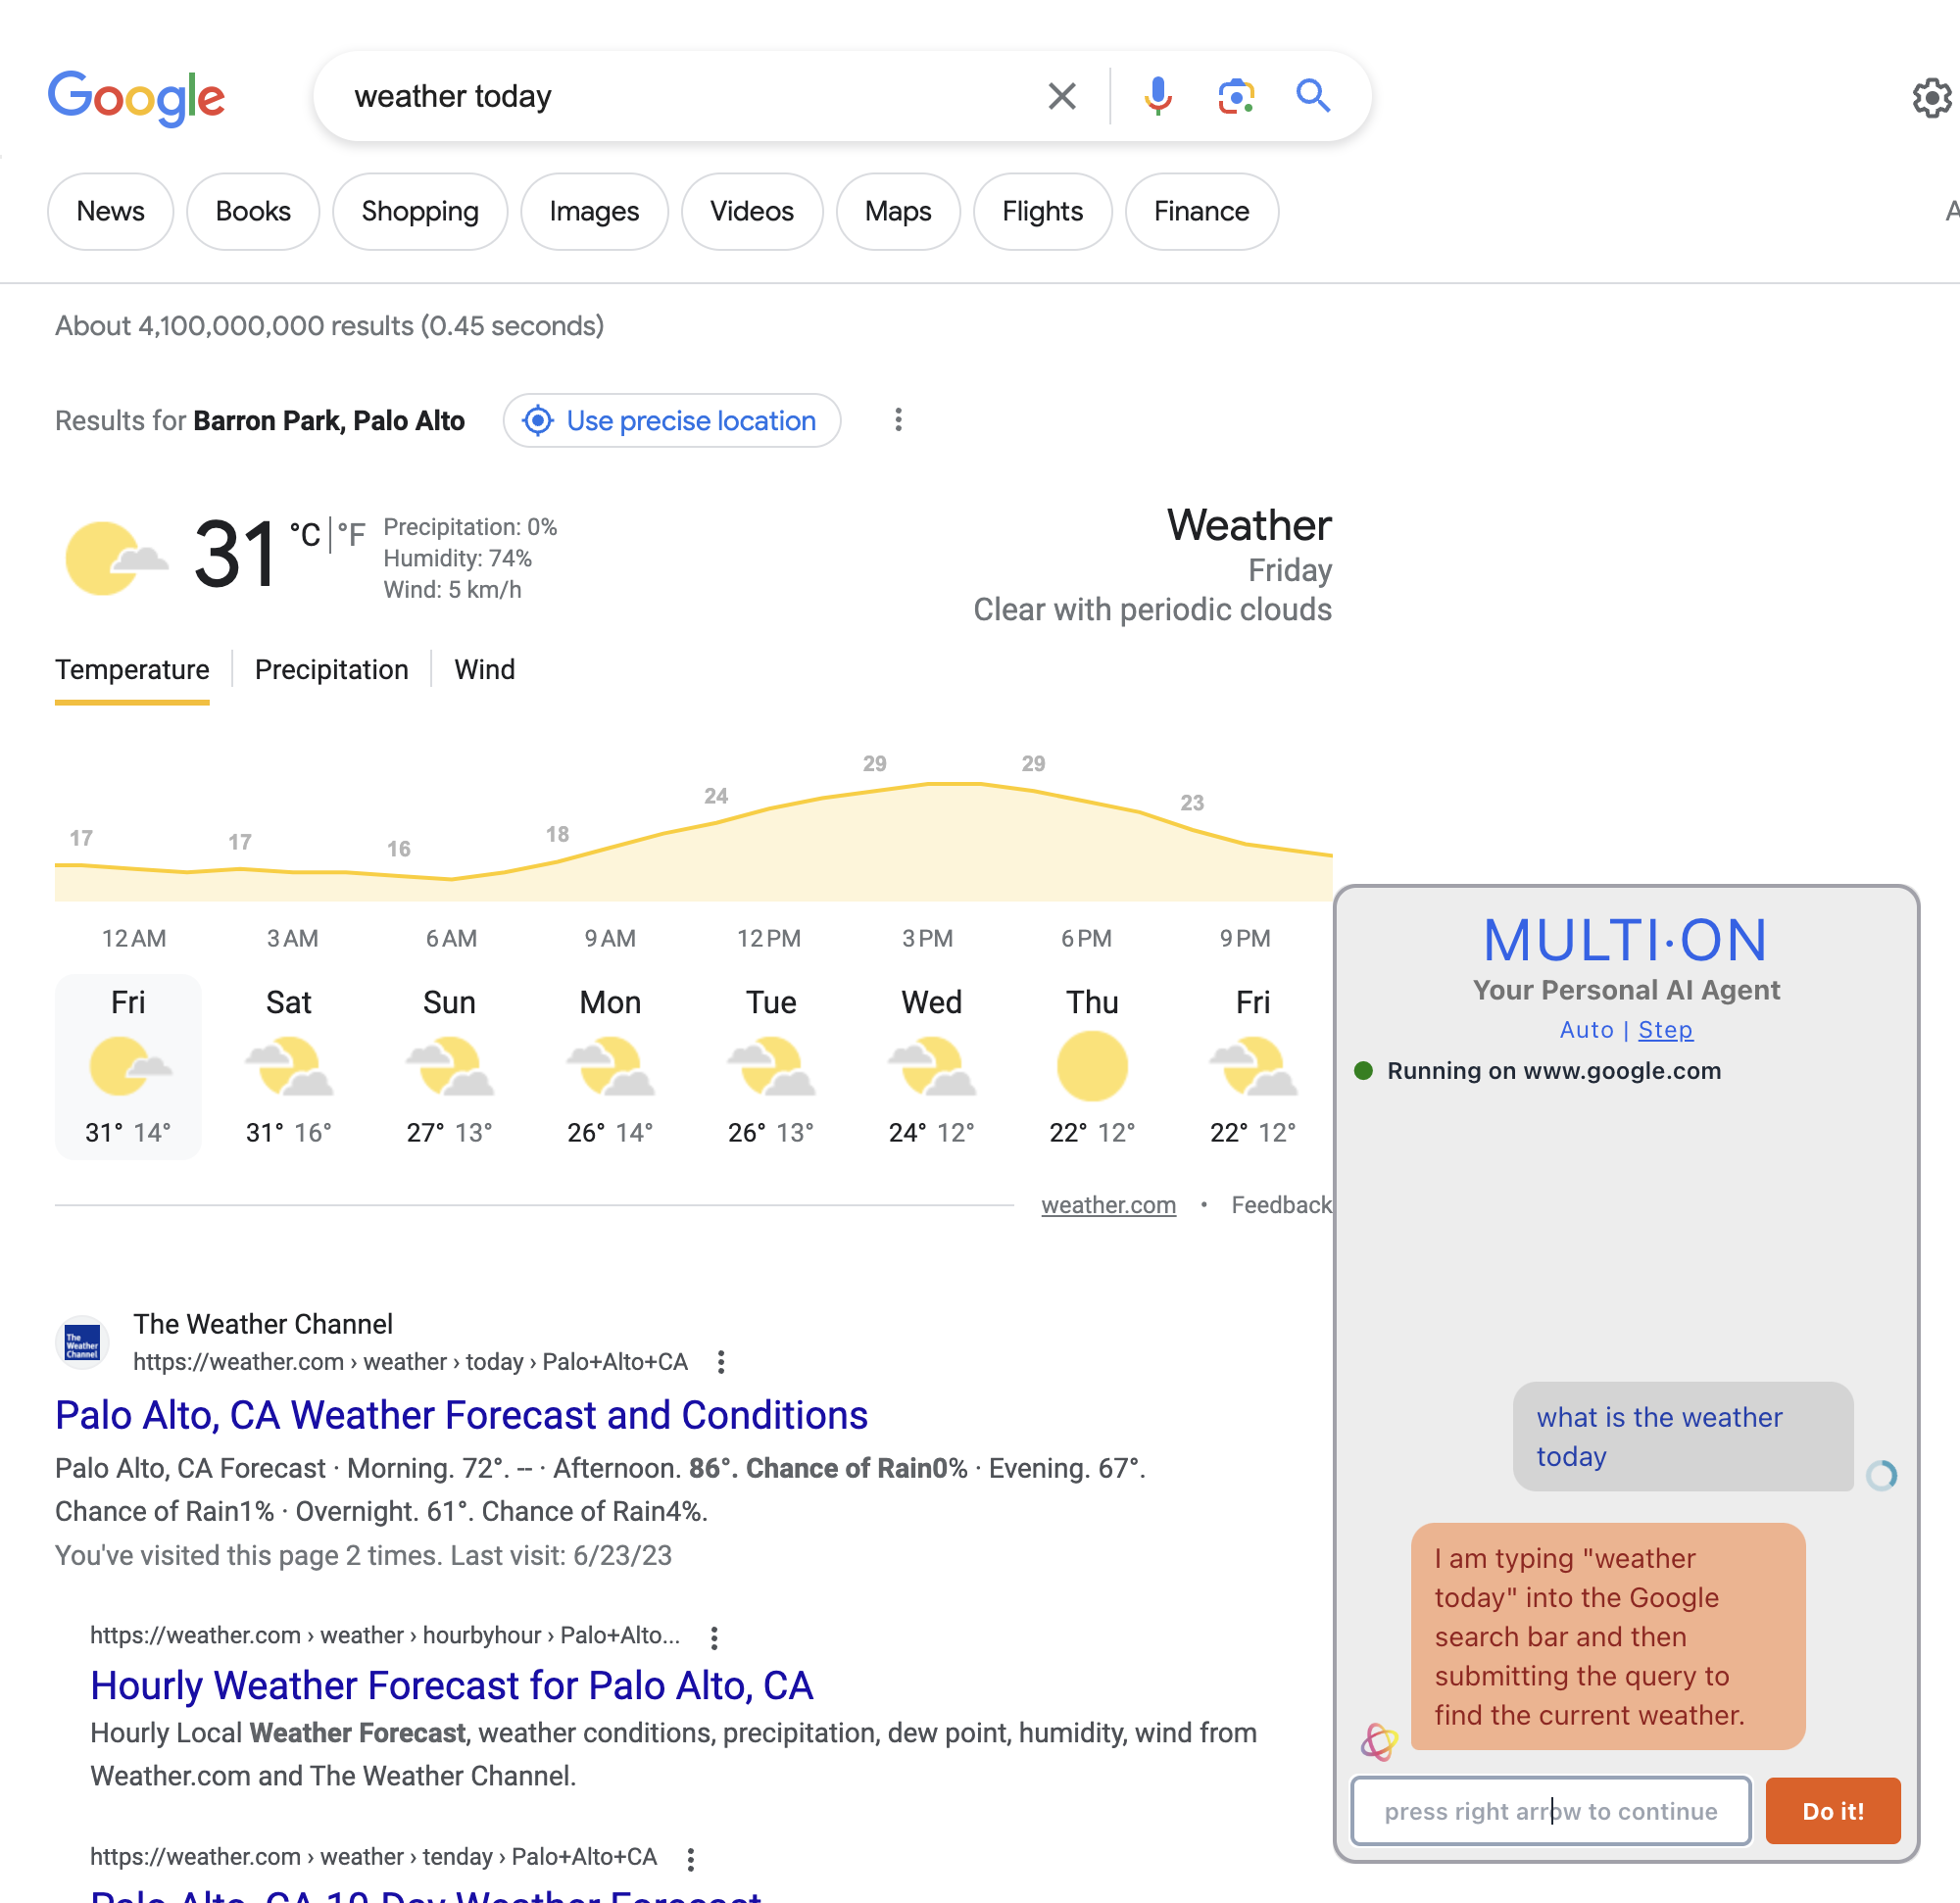

'1371659715'

In [23]:
response = multion.new_session({"input": "what is the weather today","url": "https://www.google.com"})
print(response)
tabId = response['tabId']
tabId

session updated


{'url': 'https://www.google.com',
 'screenshot': '',
 'tabId': '1371659715',
 'message': 'The weather today in Barron Park, Palo Alto is clear with periodic clouds. The temperature is 31 degrees Celsius, with 0% precipitation, 74% humidity, and a wind speed of 5 km/h.\n',
 'status': 'DONE'}
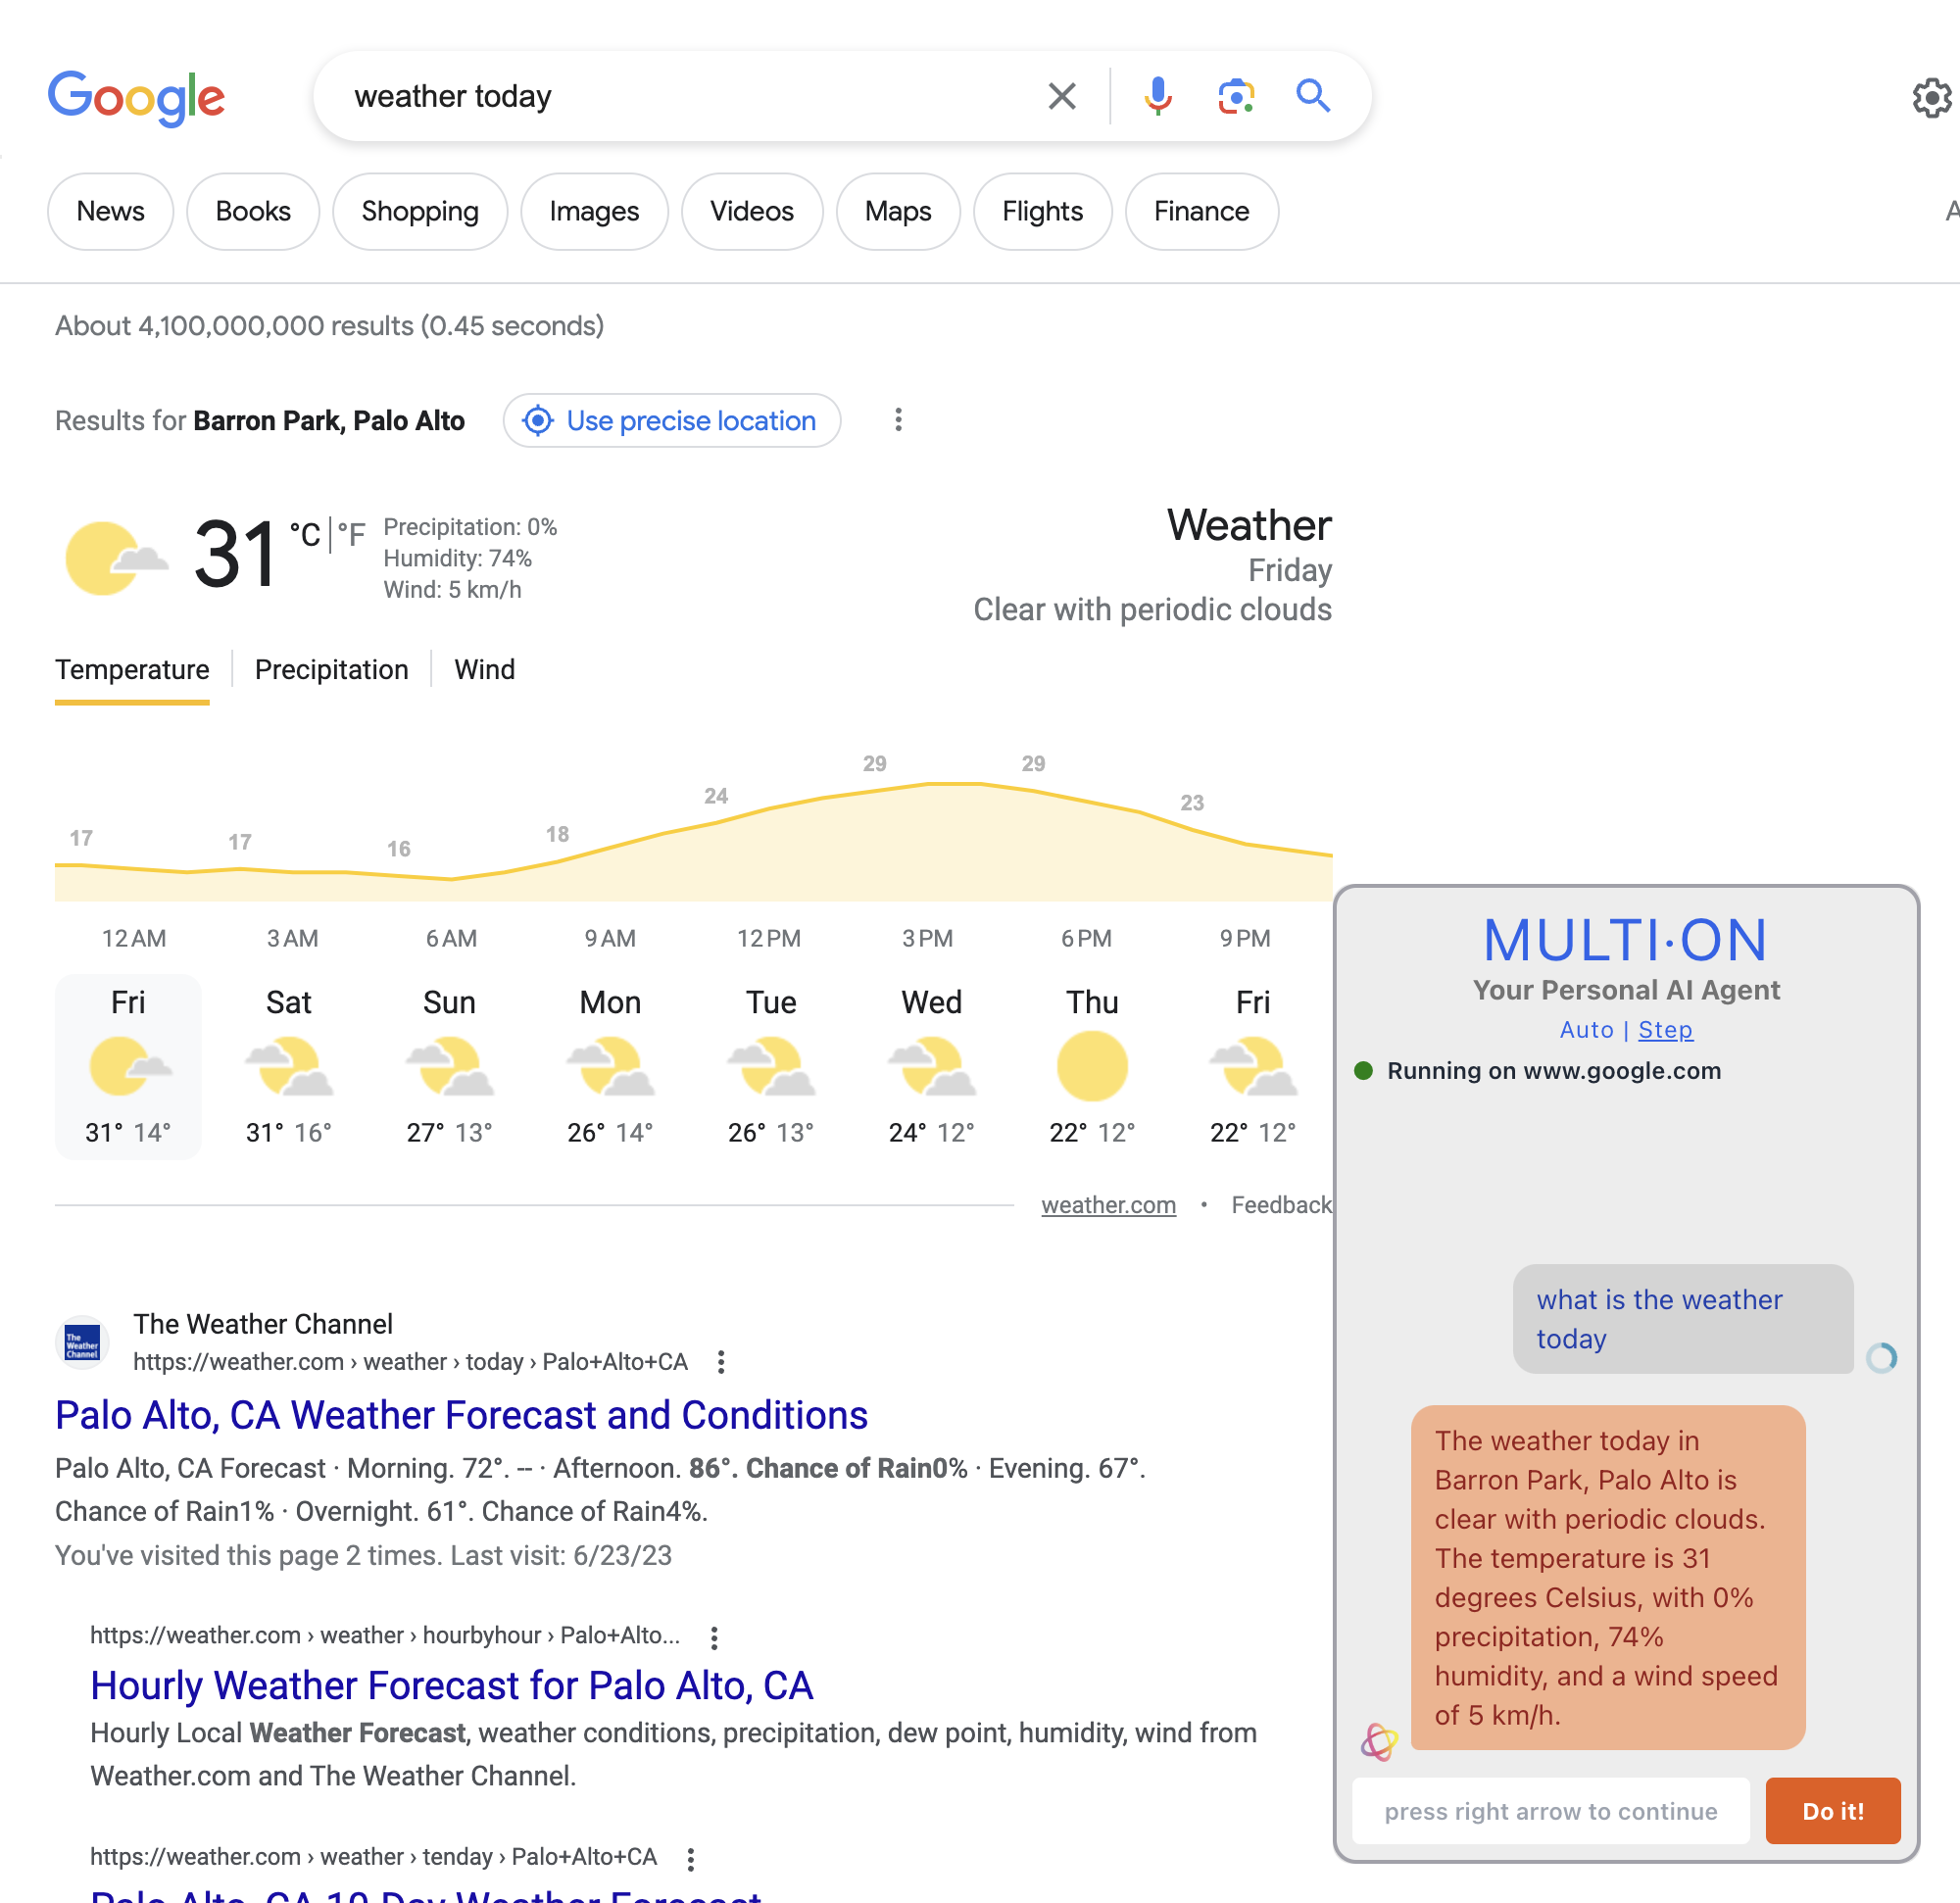

In [27]:
response = multion.update_session(tabId, {"input": "what is the weather today","url": "https://www.google.com"})
response

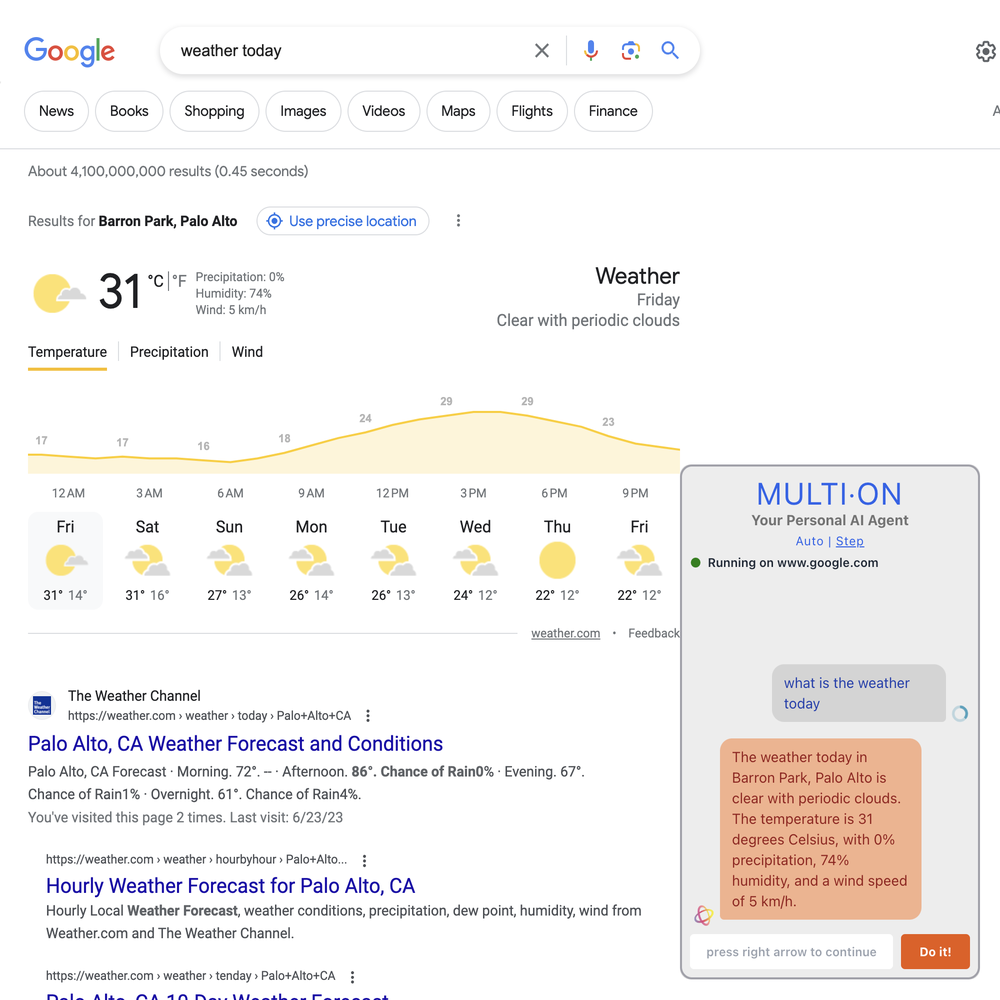

In [28]:
multion.get_screenshot(response, height=1000, width=1000)